Q1. What is the mathematical formula for a linear SVM?

For a binary classification problem, where you have two classes, often denoted as +1 and -1:

Given a set of training data points represented as (x_i, y_i), where x_i is the feature vector for the i-th data point and y_i is its corresponding class label (+1 or -1), the linear SVM aims to find a hyperplane defined by:

w · x + b = 0

Here:

w is the weight vector that determines the orientation of the hyperplane.
x is the feature vector of a data point.
b is the bias term (also known as the intercept), which shifts the hyperplane away from the origin.

Q2. What is the objective function of a linear SVM?

Minimize 1/2 ||w||^2:

||w|| represents the Euclidean norm (L2 norm) of the weight vector w. This term is often referred to as the "regularization term" or "penalty term."
The objective is to minimize the square of the norm of w, which encourages the SVM to find a hyperplane that has a larger margin between the classes. This margin-maximizing aspect is crucial for generalization and robustness.
Subject to y_i(w · x_i + b) >= 1 for all training data points (i):

This represents the constraint that all training data points should be correctly classified by the hyperplane and should be located on the correct side of the decision boundary.
In other words, the product of the class label y_i and the signed distance of each data point x_i from the hyperplane (w · x_i + b) should be greater than or equal to 1. If this constraint is satisfied, it means that the data point is correctly classified with a margin of at least 1.

Q3. What is the kernel trick in SVM?

The kernel trick is a fundamental concept in Support Vector Machines (SVMs) that allows SVMs to handle nonlinearly separable data and complex decision boundaries by implicitly transforming the input data into a higher-dimensional feature space. This transformation is performed using a mathematical function called a "kernel." The kernel trick makes SVMs a powerful tool for both linear and nonlinear classification and regression tasks.

Q4. What is the role of support vectors in SVM Explain with example

Identifying Support Vectors:

When you train the SVM, it finds the hyperplane that separates the two classes with the maximum margin. In this case, the hyperplane might look like a diagonal line.
Support vectors are the data points that are closest to the decision boundary or hyperplane. In this example, the support vectors would be some of the points from both classes.
Defining the Decision Boundary:

The decision boundary of the SVM is determined by the support vectors and the margin. It is equidistant from the nearest support vectors on both sides.
In our example, the decision boundary is a straight line that separates the dots and crosses. It is defined by the support vectors.
Margin Optimization:

The margin is the distance between the decision boundary and the closest support vectors. The SVM's objective is to maximize this margin while ensuring that all data points are correctly classified.
In our example, the margin would be the distance between the decision boundary and the closest support vectors from both classes.
Classifying New Data:

Once the SVM is trained, it can classify new, unseen data points based on which side of the decision boundary they fall.
If a new data point is closer to the decision boundary, it might be classified based on the support vectors it is nearest to.

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?

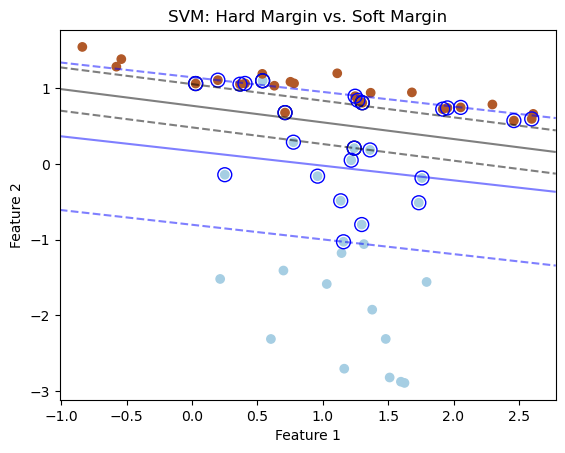

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Create a synthetic dataset
X, y = datasets.make_classification(
    n_samples=50, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42
)

# Fit a hard margin SVM
svm_hard = SVC(kernel='linear', C=1e6)
svm_hard.fit(X, y)

# Fit a soft margin SVM
svm_soft = SVC(kernel='linear', C=0.1)
svm_soft.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plot the hyperplane
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z_hard = svm_hard.decision_function(xy).reshape(xx.shape)
Z_soft = svm_soft.decision_function(xy).reshape(xx.shape)

# Plot decision boundaries and margins
plt.contour(xx, yy, Z_hard, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.contour(xx, yy, Z_soft, colors='b', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot support vectors
plt.scatter(svm_hard.support_vectors_[:, 0], svm_hard.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.scatter(svm_soft.support_vectors_[:, 0], svm_soft.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='b')

plt.title('SVM: Hard Margin vs. Soft Margin')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Q6. SVM Implementation through Iris dataset.
~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
~ Compute the accuracy of the model on the testing setl
~ Plot the decision boundaries of the trained model using two of the featuresl
~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.

Accuracy of the SVM: 90.00%


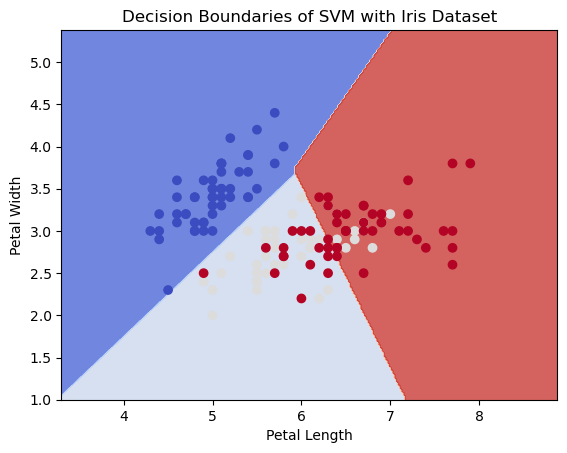

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Only using the first two features for visualization
y = iris.target

# Split the dataset into a training set and a testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear SVM classifier
svm = SVC(kernel='linear', C=1)  # You can experiment with different values of C
svm.fit(X_train, y_train)

# Predict labels for the testing set
y_pred = svm.predict(X_test)

# Compute the accuracy of the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM: {accuracy * 100:.2f}%")

# Plot decision boundaries using two features (petal length and petal width)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Boundaries of SVM with Iris Dataset')
plt.show()
